In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
movies = pd.read_csv('BigML_Dataset_5f50a62c2fb31c516d000176.csv')

In [3]:
movies['metascore'] = pd.to_numeric(movies['metascore'])
movies['month'] = pd.to_numeric(movies['release_date.month'])
movies['votes'] = pd.to_numeric(movies['votes'])
movies['gross'] = pd.to_numeric(movies['gross'])

In [4]:
movies_new = movies[['year', 'movie', 'certificate', 'genre', 'duration', 'rate', 'metascore', 'votes', 'gross', 
                   'release_date', 'user_reviews', 'critic_reviews', 'popularity', 'awards_wins', 'awards_nominations',
                   'Oscar_nominated', 'month']]

new_movies_new = movies_new.loc[movies['certificate'] != 'Not Rated']
new_movies_new = new_movies_new.loc[movies['certificate'] != 'TV-MA']


np.random.seed(2)
train = new_movies_new.sample(round(movies_new.shape[0]*0.7))
test = new_movies_new.drop(train.index)

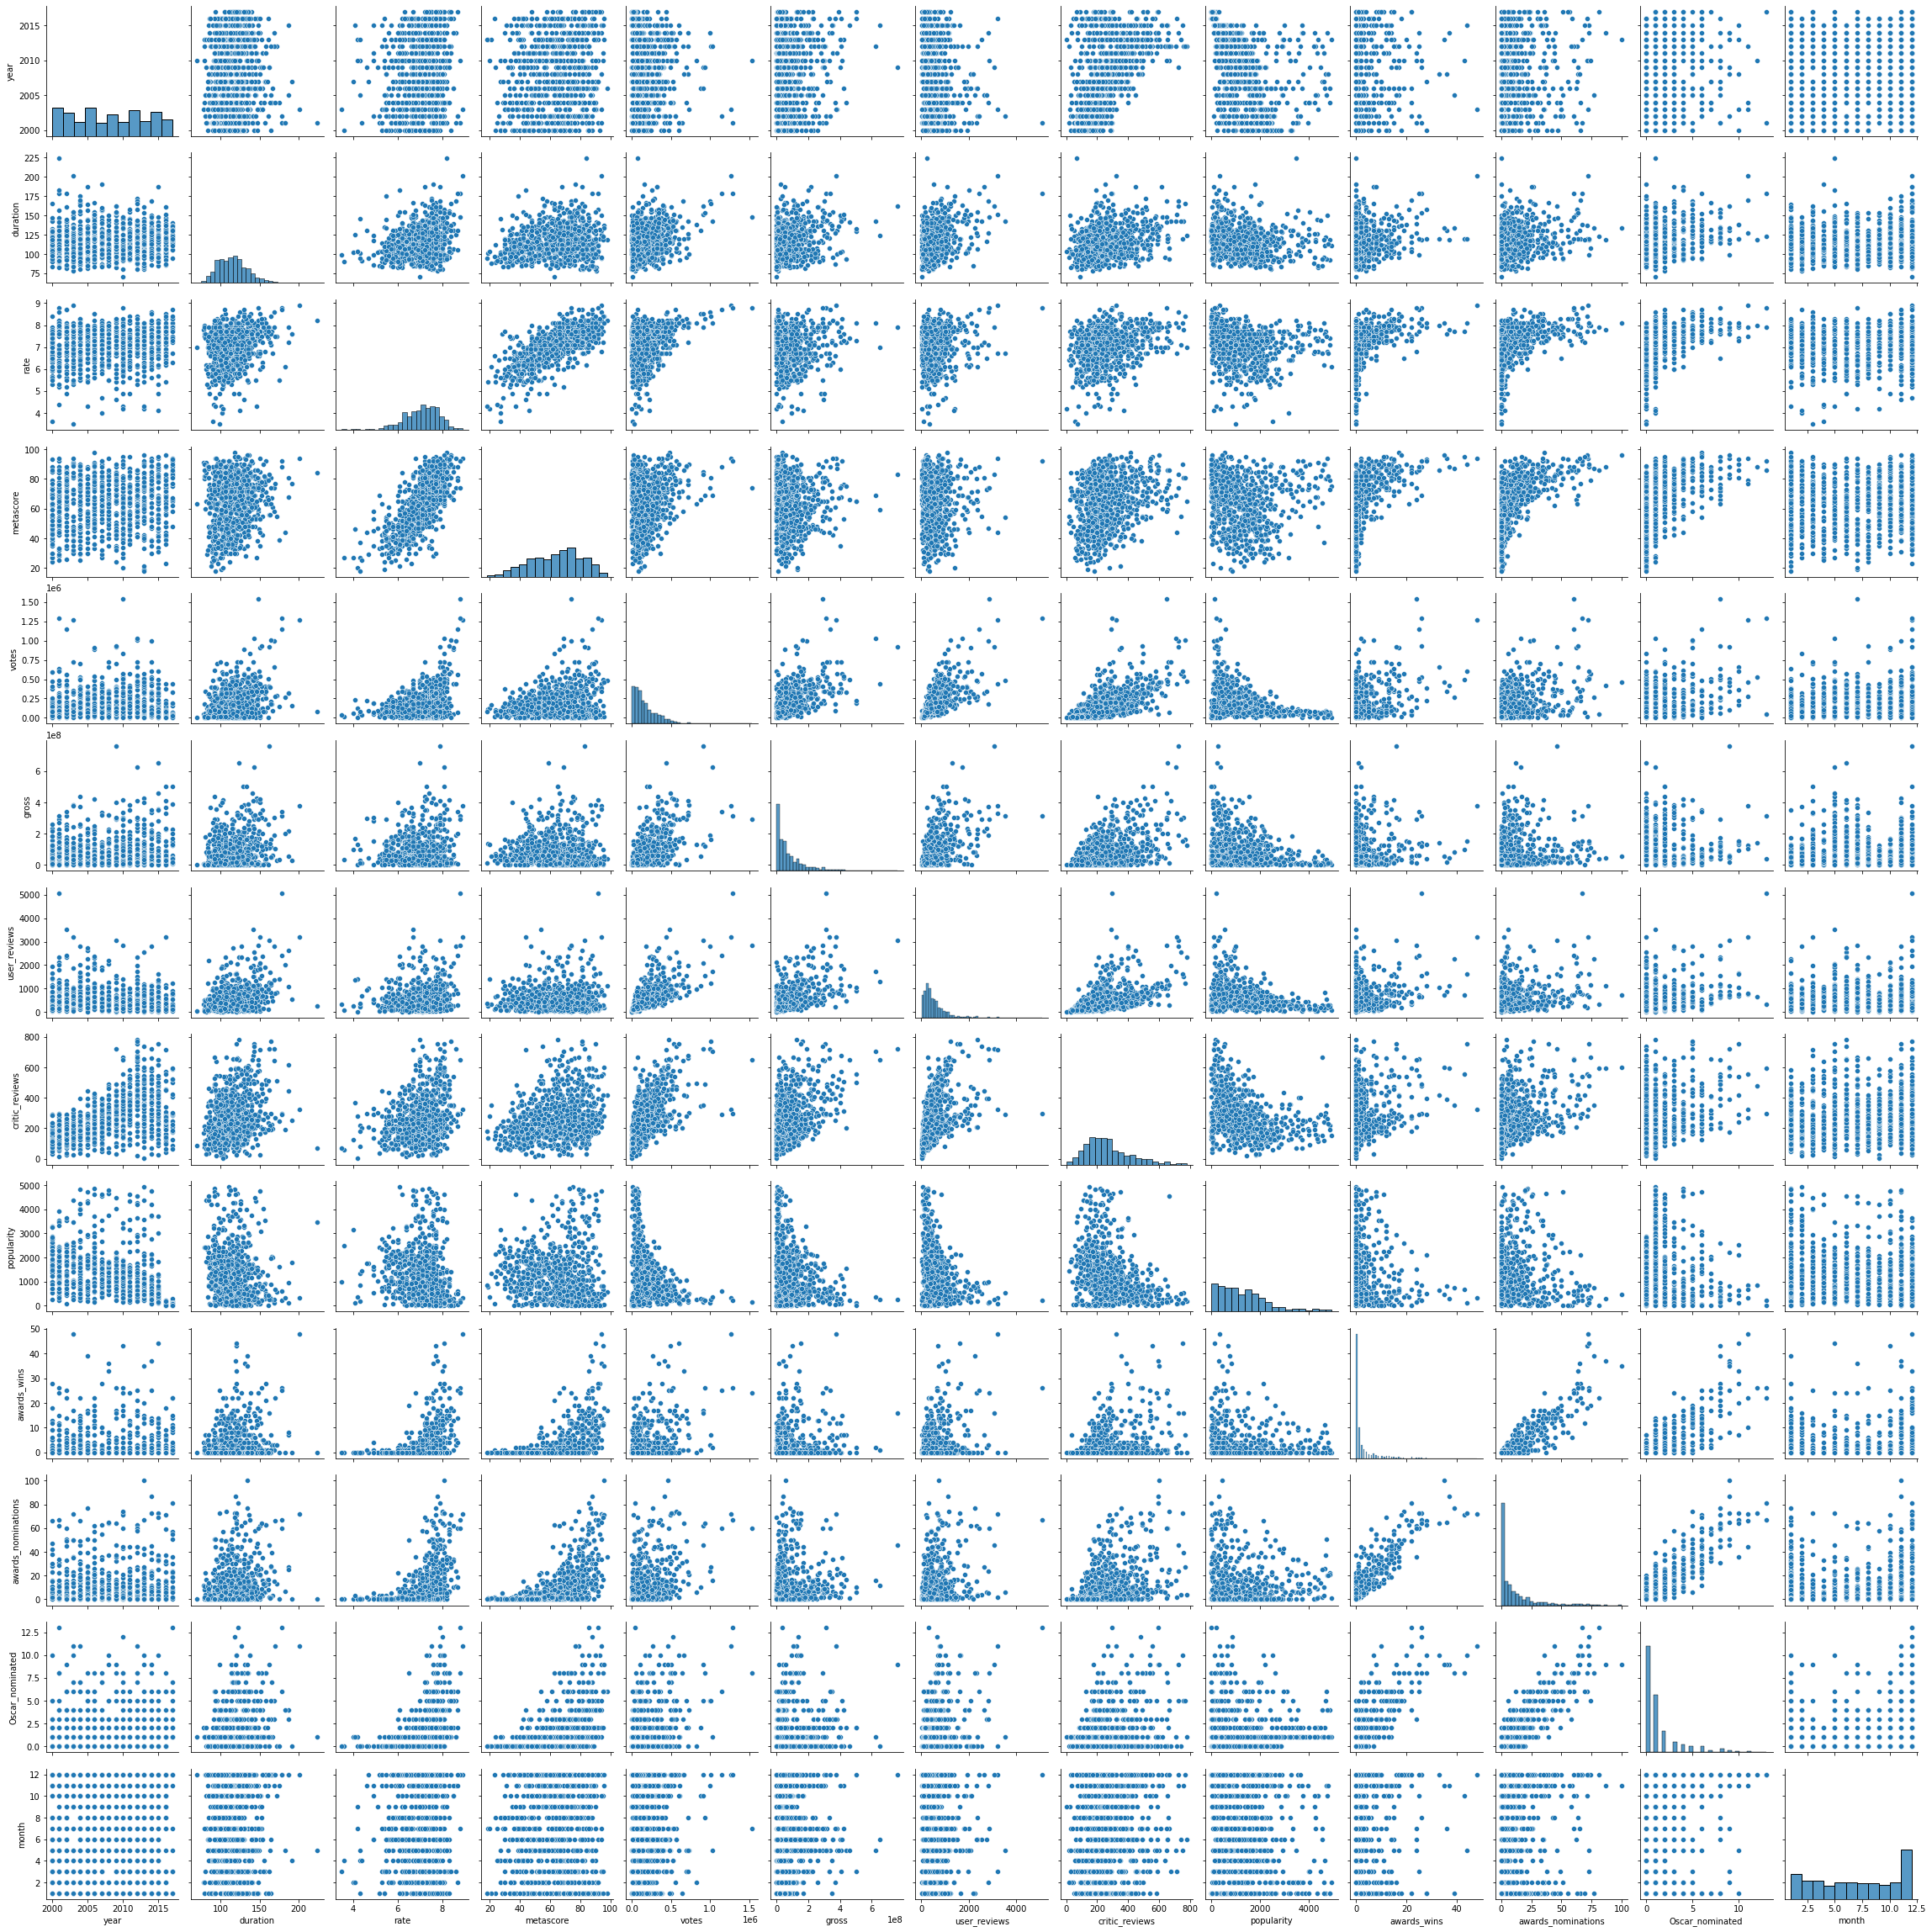

In [5]:
sns.pairplot(train)

<AxesSubplot:xlabel='votes', ylabel='gross'>

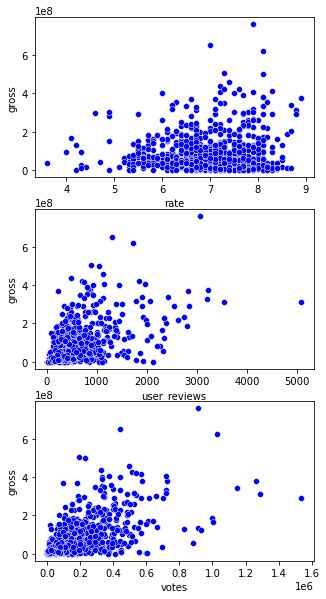

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5,10))

sns.scatterplot(ax = axs[0], x = train.rate, y=train.gross, color = 'blue')
sns.scatterplot(ax = axs[1], x = train.user_reviews, y=train.gross, color = 'blue')
sns.scatterplot(ax = axs[2], x = train.votes, y=train.gross, color = 'blue')

<AxesSubplot:xlabel='popularity', ylabel='gross'>

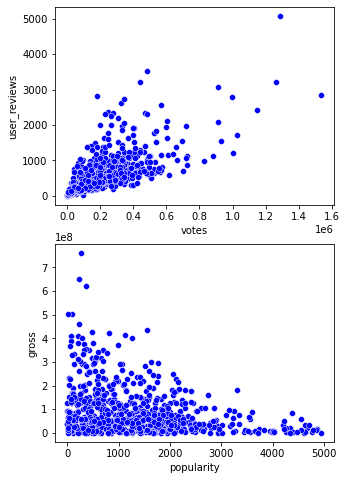

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,8))

sns.scatterplot(ax = axs[0], x = train.votes, y=train.user_reviews, color = 'blue')
sns.scatterplot(ax = axs[1], x = train.popularity, y=train.gross, color = 'blue')